In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import polars as pl


In [43]:
raw_data = pl.read_csv('/home/gyli/GP_HP/data/hypertension.csv', dtypes={'年龄' : pl.Float64}).with_columns(pl.col('年龄').cast(pl.Int64))

In [44]:
raw_data['是否高血压'].value_counts()

是否高血压,count
i64,u32
1,16215
0,17072


In [34]:
data = raw_data.filter(pl.col('年龄') < 1)
data.shape

(26, 24)

In [35]:
raw_data = raw_data.filter(pl.col('年龄') >= 1)

In [40]:
raw_data.shape

(33261, 24)

In [36]:
raw_pd = raw_data.to_pandas()

In [38]:
negative_rows = raw_pd[(raw_pd >= 0).all(axis=1)]

In [39]:
negative_rows

,年龄,中性粒细胞数,淋巴细胞数,嗜酸性粒细胞数,嗜碱性粒细胞数,总蛋白,白蛋白,球蛋白,总胆红素,直接胆红素,...,谷草谷丙,甘油三酯,高密度脂蛋白,低密度脂蛋白,红细胞平均体积,凝血酶原时间,国际标准化比值,活化部分凝血活酶时间,纤维蛋白原,是否高血压
0,79,9.260000,2.140000,0.180000,0.030000,67.948927,39.546489,28.401192,10.637813,3.191754,...,1.20000,0.570000,1.100000,1.670000,95.000000,13.323282,1.061930,33.946848,3.590508,0
1,73,2.890000,1.330000,0.130000,0.020000,61.000000,40.100000,20.900000,12.600000,4.900000,...,1.40000,1.460000,0.850000,0.860000,90.900000,10.400000,0.870000,26.000000,2.030000,0
2,65,4.680000,2.130000,0.200000,0.060000,61.500000,39.100000,22.400000,13.200000,4.600000,...,0.60000,1.030000,1.200000,3.220000,89.500000,10.200000,0.850000,27.100000,2.570000,0
3,44,4.603406,2.157543,0.172844,0.009425,73.600000,40.500000,33.100000,14.500000,5.100000,...,1.00000,1.160000,1.250000,3.620000,91.860633,12.714961,1.000874,32.554017,3.452106,0
4,53,4.847728,1.971421,0.163157,0.017470,70.900000,41.200000,29.700000,17.300000,5.800000,...,1.00000,1.730000,1.770000,3.350000,93.074734,12.533349,0.966540,33.047475,3.903806,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33256,68,4.857917,2.117560,0.194136,0.015260,70.353715,43.506534,26.846101,11.069368,3.143379,...,1.09598,1.670000,1.311960,3.133671,92.155536,12.898219,1.009225,33.649698,3.702692,0
33257,53,3.770986,2.197268,0.180861,0.015753,76.000000,48.300000,27.700000,18.500000,4.000000,...,0.50000,0.590000,1.510000,2.960000,92.603595,12.946776,1.013534,33.556394,3.551554,0
33258,51,4.710000,2.970000,0.780000,0.010000,85.100000,46.200000,38.900000,7.500000,2.100000,...,0.80000,2.627766,1.027138,3.087092,65.300000,12.400000,0.920000,35.800000,3.470000,1
33259,69,5.990000,2.310000,0.320000,0.000000,63.700000,36.100000,27.600000,9.600000,2.800000,...,0.90000,0.840000,0.890000,1.950000,65.100000,13.200000,1.000000,41.500000,6.080000,0


In [42]:
final = pl.from_pandas(negative_rows)
final['是否高血压'].value_counts()

是否高血压,count
i64,u32
1,16205
0,17030


In [11]:
raw_pd[raw_pd.isnull().any(axis=1)]

,年龄,中性粒细胞数,淋巴细胞数,嗜酸性粒细胞数,嗜碱性粒细胞数,总蛋白,白蛋白,球蛋白,总胆红素,直接胆红素,...,谷草谷丙,甘油三酯,高密度脂蛋白,低密度脂蛋白,红细胞平均体积,凝血酶原时间,国际标准化比值,活化部分凝血活酶时间,纤维蛋白原,是否高血压


In [2]:
tbl.columns

Index(['年龄', '中性粒细胞数', '淋巴细胞数', '嗜酸性粒细胞数', '嗜碱性粒细胞数', '总蛋白', '白蛋白', '球蛋白',
       '总胆红素', '直接胆红素', '钾', '钠', '钙', '尿素氮', '谷草谷丙', '甘油三酯', '高密度脂蛋白',
       '低密度脂蛋白', '红细胞平均体积', '凝血酶原时间', '国际标准化比值', '活化部分凝血活酶时间', '纤维蛋白原',
       '是否高血压'],
      dtype='object')

In [8]:
tbl[tbl['是否高血压'] == 1].count()

年龄            16215
中性粒细胞数        16215
淋巴细胞数         16215
嗜酸性粒细胞数       16215
嗜碱性粒细胞数       16215
总蛋白           16215
白蛋白           16215
球蛋白           16215
总胆红素          16215
直接胆红素         16215
钾             16215
钠             16215
钙             16215
尿素氮           16215
谷草谷丙          16215
甘油三酯          16215
高密度脂蛋白        16215
低密度脂蛋白        16215
红细胞平均体积       16215
凝血酶原时间        16215
国际标准化比值       16215
活化部分凝血活酶时间    16215
纤维蛋白原         16215
是否高血压         16215
dtype: int64

Text(0.5, 1.0, '五年内是否患上高血压')

/home/gyli/.local/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  func(*args, **kwargs)
/home/gyli/.local/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  func(*args, **kwargs)
/home/gyli/.local/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 20869 (\N{CJK UNIFIED IDEOGRAPH-5185}) missing from current font.
  func(*args, **kwargs)
/home/gyli/.local/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from current font.
  func(*args, **kwargs)
/home/gyli/.local/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 21542 (\N{CJK UNIFIED IDEOGRAPH-5426}) missing from current font.
  func(*args, **kwargs)
/home/gyli/.local/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning

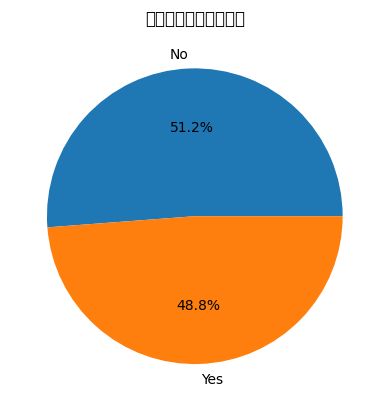

In [13]:
y = [17014, 16215]
x = ['No', 'Yes']
plt.pie(y, labels=x, autopct='%1.1f%%')
plt.title('五年内是否患上高血压')